In [4]:
# 1. Importação de pacotes

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings
filterwarnings('ignore')

# Estilo de gráfico
sns.set_style("whitegrid")


In [6]:
# 2. Carregamento dos Dados

In [7]:
dataset_path = r'C:\Users\Machoski\Desktop\AC03\spotify_top_1000_tracks.csv'
df = pd.read_csv(dataset_path)

# Backup do DataFrame original
df_original = df.copy()

In [8]:
# 3. Inspeção Inicial dos Dado

In [9]:
print("Visualização das primeiras 10 linhas:")
print(df.head(10))

print("\nInformações gerais do DataFrame:")
print(df.info())

print("\nEstatísticas descritivas:")
print(df.describe())

print("\nValores únicos por coluna:")
print(df.nunique())

print("\nDados faltantes por coluna:")
print(df.isnull().sum())

Visualização das primeiras 10 linhas:
                        track_name                artist  \
0         All The Stars (with SZA)        Kendrick Lamar   
1                          Starboy            The Weeknd   
2                         Señorita          Shawn Mendes   
3                       Heat Waves         Glass Animals   
4                  Let Me Love You              DJ Snake   
5                         La La La           Naughty Boy   
6                       Apocalypse  Cigarettes After Sex   
7                     Good For You          Selena Gomez   
8                             Baby         Justin Bieber   
9  There's Nothing Holdin' Me Back          Shawn Mendes   

                                               album release_date  popularity  \
0  Black Panther The Album Music From And Inspire...   2018-02-09          95   
1                                            Starboy   2016-11-25          90   
2                                           Señorita   201

In [10]:
# 4. Limpeza e Conversão de Dados

In [11]:
# Converter release_date para datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
print("\nValores nulos após conversão de datas:", df['release_date'].isnull().sum())



Valores nulos após conversão de datas: 23


In [12]:
# 5. Visualização de Outliers na duração

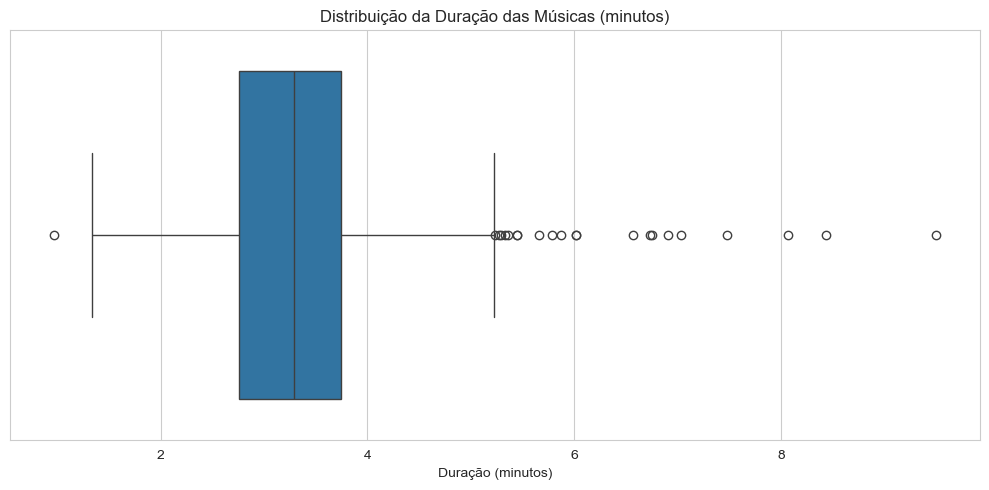

In [13]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['duration_min'])
plt.title("Distribuição da Duração das Músicas (minutos)")
plt.xlabel("Duração (minutos)")
plt.tight_layout()
plt.show()

In [14]:
# 6. Detecção e Remoção de Outliers com IQR

In [15]:
q1 = df['duration_min'].quantile(0.25)
q3 = df['duration_min'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Remover outliers
df = df[(df['duration_min'] >= lower_bound) & (df['duration_min'] <= upper_bound)]
print(f"\nDataset após remoção de outliers: {df.shape[0]} registros restantes")


Dataset após remoção de outliers: 978 registros restantes


In [16]:
# 7. Análise: Duração vs Popularidade

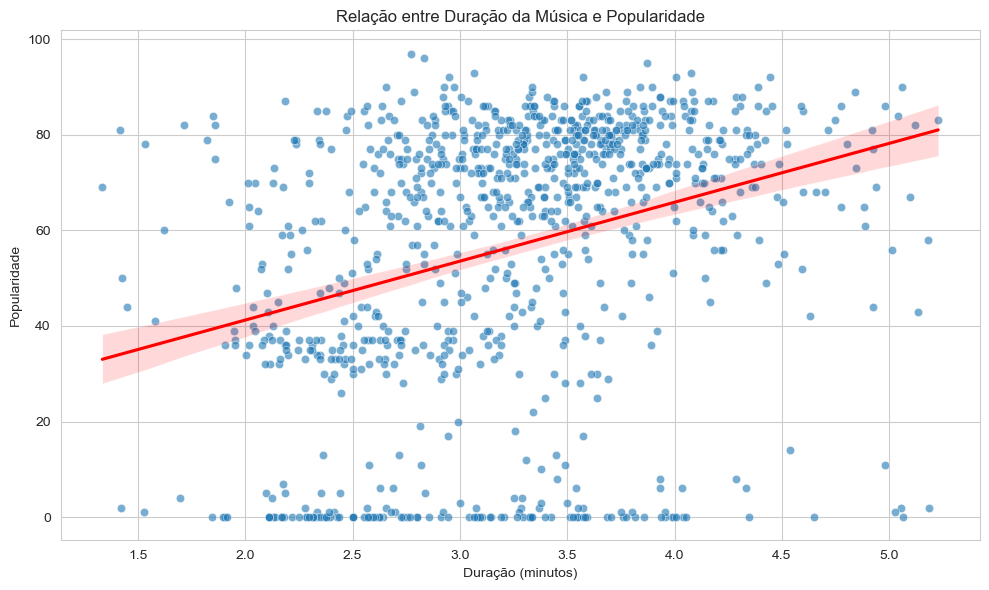

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='duration_min', y='popularity', alpha=0.6)
sns.regplot(data=df, x='duration_min', y='popularity', scatter=False, color='red')  # Linha de tendência
plt.title("Relação entre Duração da Música e Popularidade")
plt.xlabel("Duração (minutos)")
plt.ylabel("Popularidade")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# 8. Top 10 Artistas com Mais Faixas

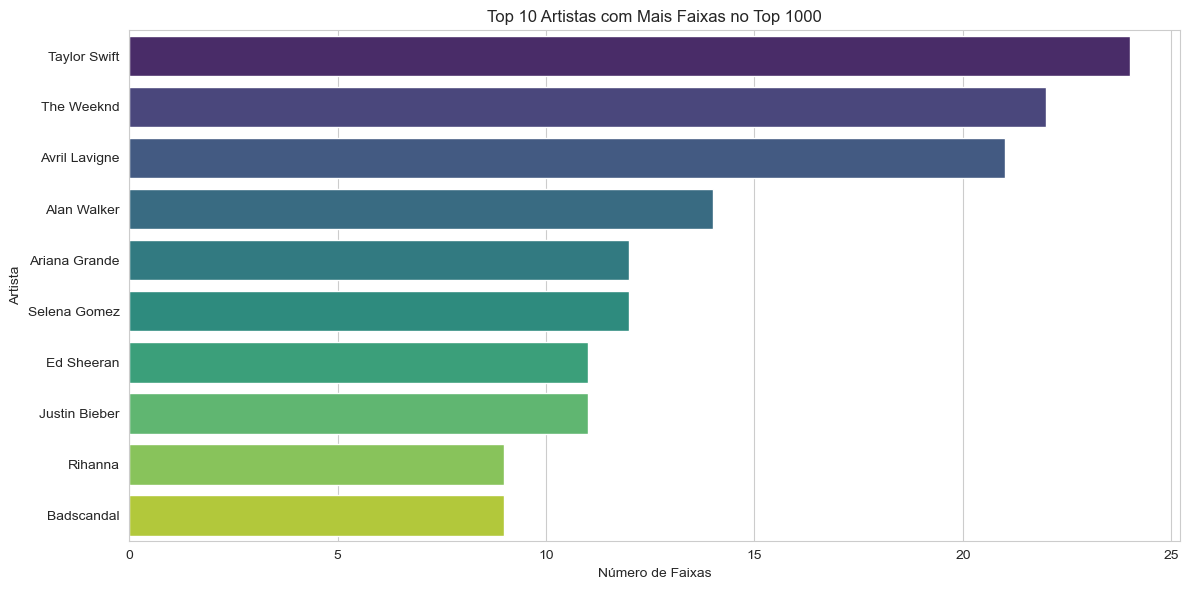

In [19]:
top_artists = df['artist'].value_counts().head(10).reset_index()
top_artists.columns = ['artist', 'track_count']

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_artists,
    x='track_count',
    y='artist',
    hue='artist',
    dodge=False,
    palette='viridis'
)
plt.title("Top 10 Artistas com Mais Faixas no Top 1000")
plt.xlabel("Número de Faixas")
plt.ylabel("Artista")
plt.legend().remove()
plt.tight_layout()
plt.show()

In [20]:
# 9. Artistas com maior popularidade média (top 10)

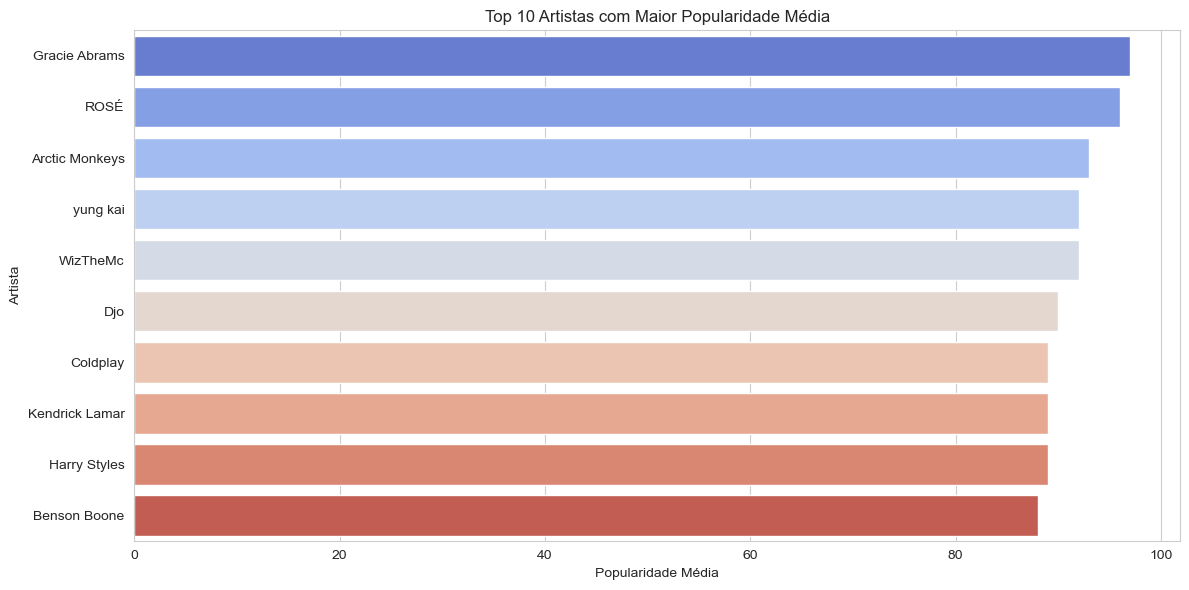

In [21]:
top_mean_popularity = (
    df.groupby('artist')['popularity']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_mean_popularity, x='popularity', y='artist', palette='coolwarm')
plt.title("Top 10 Artistas com Maior Popularidade Média")
plt.xlabel("Popularidade Média")
plt.ylabel("Artista")
plt.tight_layout()
plt.show()

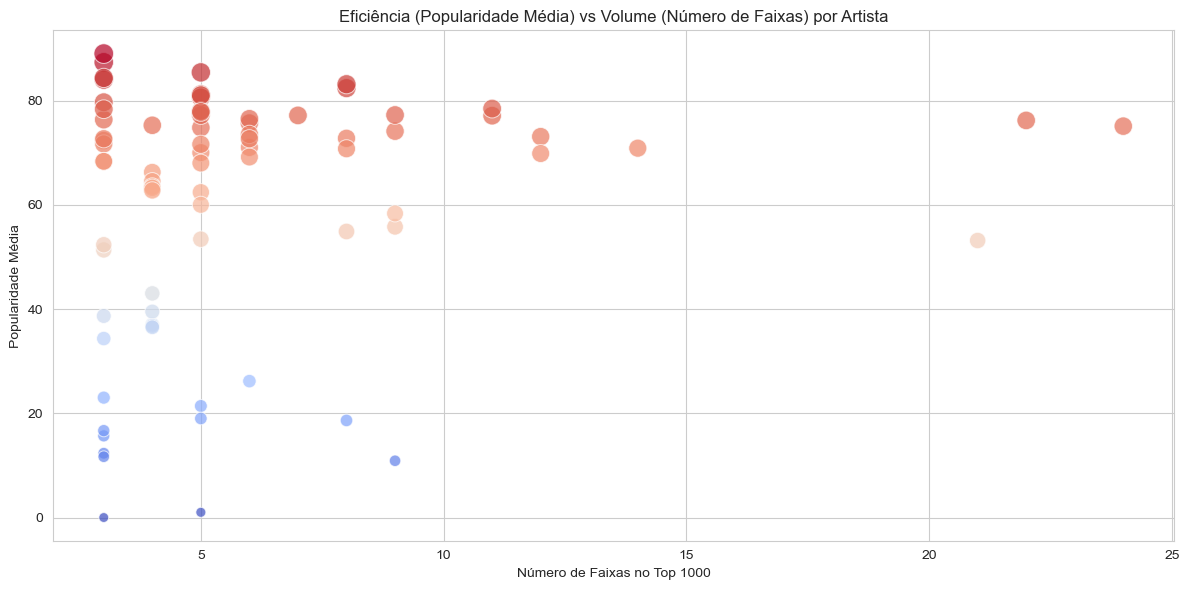

In [22]:
# Agrupar por artista: contar faixas e calcular média de popularidade
artist_stats = df.groupby('artist').agg({
    'track_name': 'count',
    'popularity': 'mean'
}).reset_index()

# Renomear colunas para clareza
artist_stats.columns = ['artist', 'track_count', 'avg_popularity']

# Filtrar para artistas com 3 ou mais faixas (evita viés de 1 hit só)
filtered_stats = artist_stats[artist_stats['track_count'] >= 3]

# Criar gráfico de dispersão
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=filtered_stats,
    x='track_count',
    y='avg_popularity',
    hue='avg_popularity',
    palette='coolwarm',
    size='avg_popularity',
    sizes=(50, 200),
    legend=False,
    alpha=0.7
)

# Títulos e rótulos
plt.title("Eficiência (Popularidade Média) vs Volume (Número de Faixas) por Artista")
plt.xlabel("Número de Faixas no Top 1000")
plt.ylabel("Popularidade Média")
plt.grid(True)
plt.tight_layout()
plt.show()